In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

df = pd.read_csv('exams.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
df.head(10)

Dataset Shape: (1000, 8)

First 10 rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [6]:
print("Column Information:")
print(df.info())

print("\n" + "="*60)
print("Basic Statistics for Numerical Columns:")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("Check for Missing Values:")
print("="*60)
print(df.isnull().sum())

print("\n" + "="*60)
print("Unique Values in Categorical Columns:")
print("="*60)
print(f"Gender: {df['gender'].unique()}")
print(f"Race/Ethnicity: {df['race/ethnicity'].unique()}")
print(f"Parental Level of Education: {df['parental level of education'].unique()}")
print(f"Lunch: {df['lunch'].unique()}")
print(f"Test Preparation Course: {df['test preparation course'].unique()}")

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Basic Statistics for Numerical Columns:
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.

Average Score Statistics:
count    1000.000000
mean       67.712000
std        14.514244
min        21.666667
25%        58.583333
50%        67.333333
75%        78.333333
max       100.000000
Name: average_score, dtype: float64

Student Success Distribution:
student_success
0    553
1    447
Name: count, dtype: int64

Success Rate: 44.7%


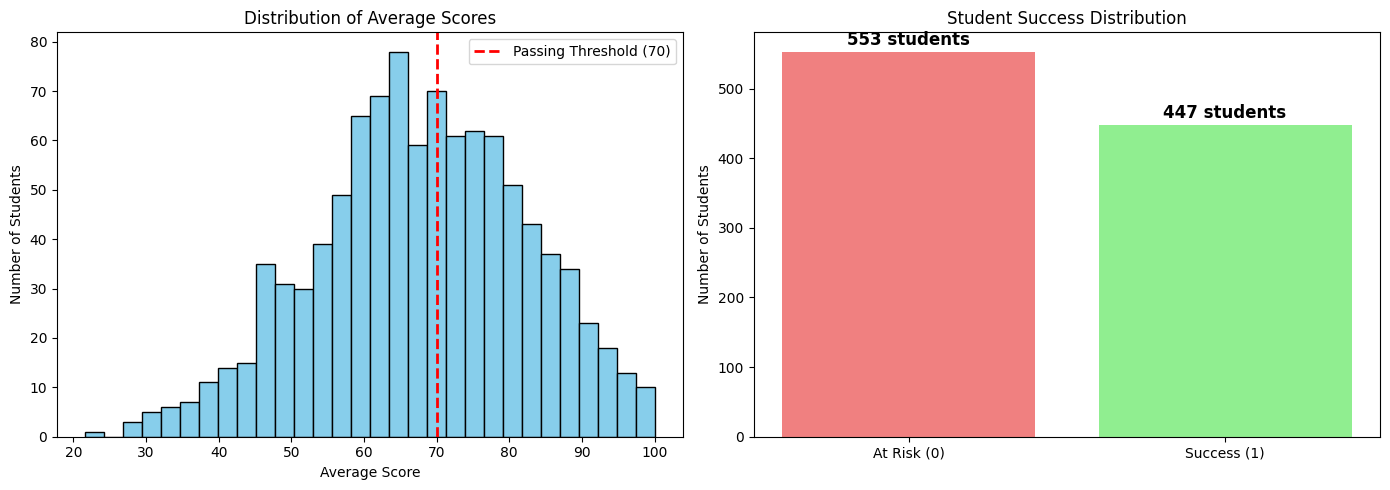


 Target variable 'student_success' created successfully!


In [10]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

df['student_success'] = (df['average_score'] >= 70).astype(int)

print("Average Score Statistics:")
print(df['average_score'].describe())

print("\n" + "="*60)
print("Student Success Distribution:")
print("="*60)
print(df['student_success'].value_counts())
print(f"\nSuccess Rate: {(df['student_success'].sum() / len(df) * 100):.1f}%")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['average_score'], bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(70, color='red', linestyle='--', linewidth=2, label='Passing Threshold (70)')
axes[0].set_xlabel('Average Score')
axes[0].set_ylabel('Number of Students')
axes[0].set_title('Distribution of Average Scores')
axes[0].legend()

success_counts = df['student_success'].value_counts()
axes[1].bar(['At Risk (0)', 'Success (1)'], success_counts.values, color=['lightcoral', 'lightgreen'])
axes[1].set_ylabel('Number of Students')
axes[1].set_title('Student Success Distribution')
axes[1].text(0, success_counts[0] + 10, f'{success_counts[0]} students', ha='center', fontsize=12, fontweight='bold')
axes[1].text(1, success_counts[1] + 10, f'{success_counts[1]} students', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Target variable 'student_success' created successfully!")

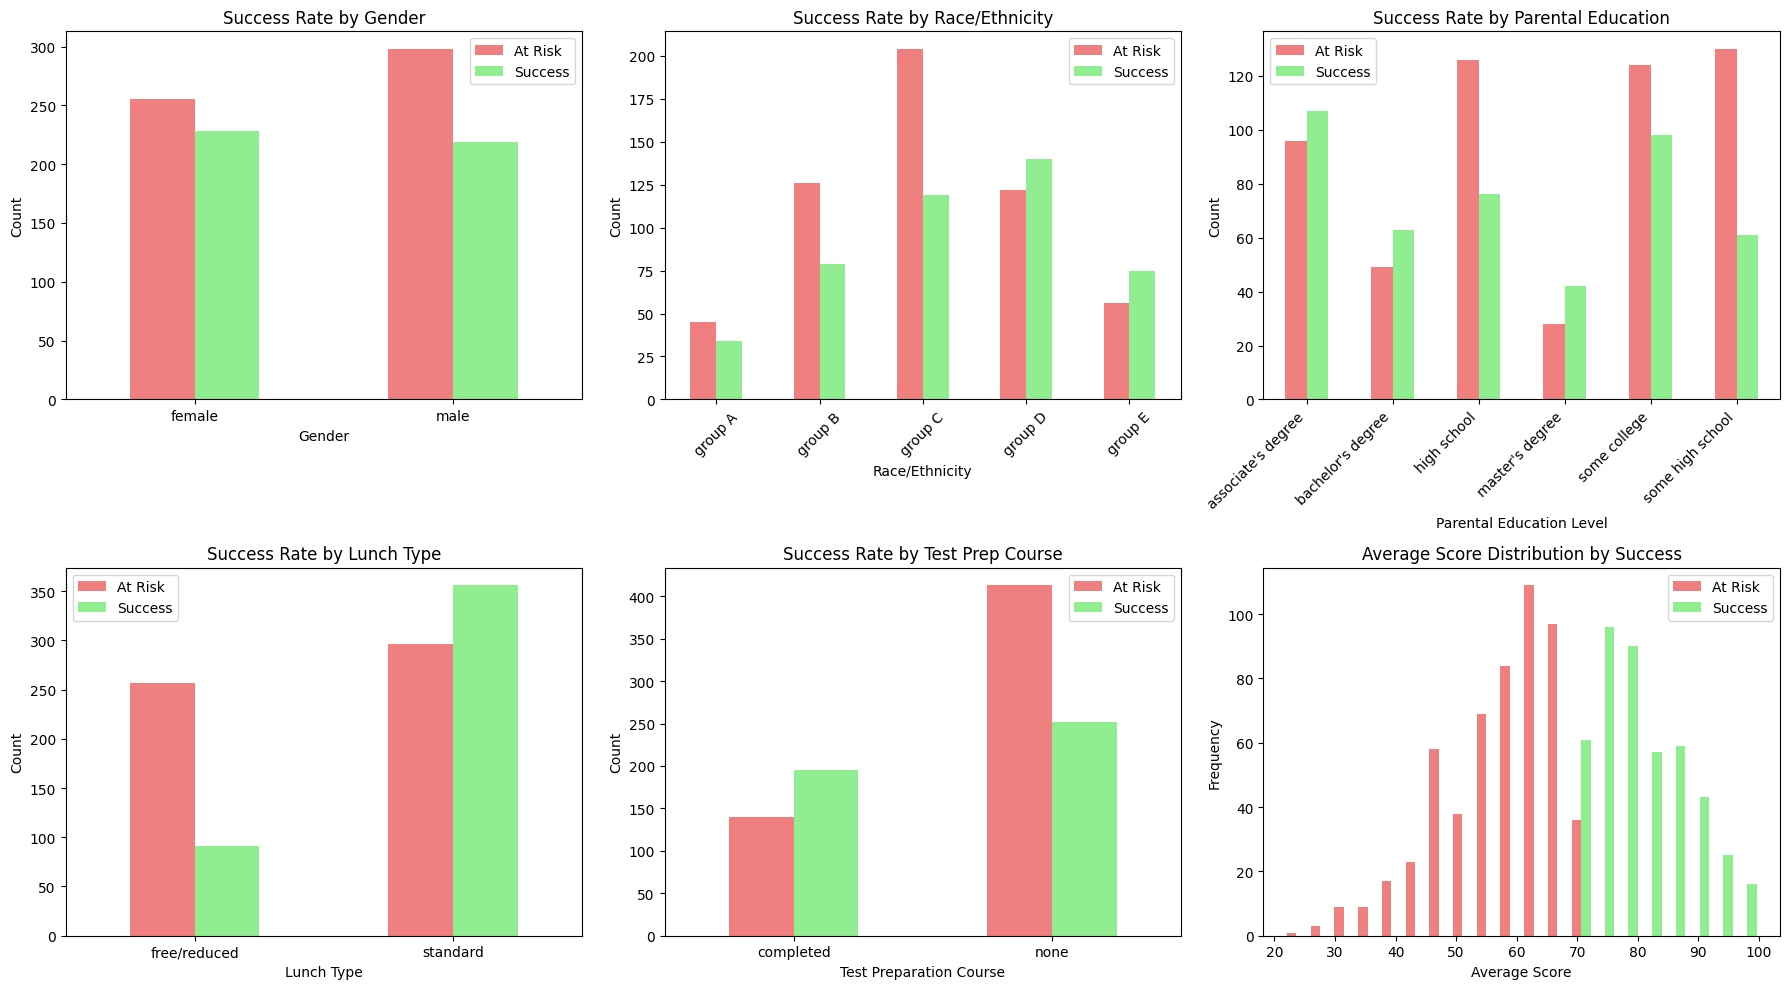

SUCCESS RATES BY CATEGORY:

By Lunch Type:
lunch
standard        0.546012
free/reduced    0.261494
Name: student_success, dtype: float64

By Test Prep Course:
test preparation course
completed    0.582090
none         0.378947
Name: student_success, dtype: float64

By Parental Education:
parental level of education
master's degree       0.600000
bachelor's degree     0.562500
associate's degree    0.527094
some college          0.441441
high school           0.376238
some high school      0.319372
Name: student_success, dtype: float64

By Gender:
gender
female    0.472050
male      0.423598
Name: student_success, dtype: float64


In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

gender_success = df.groupby(['gender', 'student_success']).size().unstack()
gender_success.plot(kind='bar', ax=axes[0, 0], color=['lightcoral', 'lightgreen'])
axes[0, 0].set_title('Success Rate by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(['At Risk', 'Success'])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

race_success = df.groupby(['race/ethnicity', 'student_success']).size().unstack()
race_success.plot(kind='bar', ax=axes[0, 1], color=['lightcoral', 'lightgreen'])
axes[0, 1].set_title('Success Rate by Race/Ethnicity')
axes[0, 1].set_xlabel('Race/Ethnicity')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['At Risk', 'Success'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

parent_ed_success = df.groupby(['parental level of education', 'student_success']).size().unstack()
parent_ed_success.plot(kind='bar', ax=axes[0, 2], color=['lightcoral', 'lightgreen'])
axes[0, 2].set_title('Success Rate by Parental Education')
axes[0, 2].set_xlabel('Parental Education Level')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(['At Risk', 'Success'])
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45, ha='right')

lunch_success = df.groupby(['lunch', 'student_success']).size().unstack()
lunch_success.plot(kind='bar', ax=axes[1, 0], color=['lightcoral', 'lightgreen'])
axes[1, 0].set_title('Success Rate by Lunch Type')
axes[1, 0].set_xlabel('Lunch Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['At Risk', 'Success'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

prep_success = df.groupby(['test preparation course', 'student_success']).size().unstack()
prep_success.plot(kind='bar', ax=axes[1, 1], color=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Success Rate by Test Prep Course')
axes[1, 1].set_xlabel('Test Preparation Course')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['At Risk', 'Success'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

axes[1, 2].hist([df[df['student_success']==0]['average_score'], 
                 df[df['student_success']==1]['average_score']], 
                bins=20, color=['lightcoral', 'lightgreen'], label=['At Risk', 'Success'])
axes[1, 2].set_title('Average Score Distribution by Success')
axes[1, 2].set_xlabel('Average Score')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("SUCCESS RATES BY CATEGORY:")
print("="*60)
print("\nBy Lunch Type:")
print(df.groupby('lunch')['student_success'].mean().sort_values(ascending=False))

print("\nBy Test Prep Course:")
print(df.groupby('test preparation course')['student_success'].mean().sort_values(ascending=False))

print("\nBy Parental Education:")
print(df.groupby('parental level of education')['student_success'].mean().sort_values(ascending=False))

print("\nBy Gender:")
print(df.groupby('gender')['student_success'].mean().sort_values(ascending=False))

In [12]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 
                       'lunch', 'test preparation course']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"\n{col}:")
    print(f"  Original values: {df[col].unique()}")
    print(f"  Encoded values: {df_model[col].unique()}")

print("\n" + "="*60)
print("All categorical variables encoded successfully!")
print("="*60)

print("\nFirst 5 rows of encoded data:")
df_model.head()


gender:
  Original values: ['male' 'female']
  Encoded values: [1 0]

race/ethnicity:
  Original values: ['group A' 'group D' 'group E' 'group B' 'group C']
  Encoded values: [0 3 4 1 2]

parental level of education:
  Original values: ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
  Encoded values: [2 5 4 0 1 3]

lunch:
  Original values: ['standard' 'free/reduced']
  Encoded values: [1 0]

test preparation course:
  Original values: ['completed' 'none']
  Encoded values: [0 1]

All categorical variables encoded successfully!

First 5 rows of encoded data:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,student_success
0,1,0,2,1,0,67,67,63,65.666667,0
1,0,3,5,0,1,40,59,55,51.333333,0
2,1,4,4,0,1,59,60,50,56.333333,0
3,1,1,2,1,1,77,78,68,74.333333,1
4,1,4,0,1,0,78,73,68,73.000000,1


In [13]:
from sklearn.model_selection import train_test_split

features_to_drop = ['student_success', 'average_score', 'math score', 'reading score', 'writing score']

X = df_model.drop(columns=features_to_drop)
y = df_model['student_success']

print("FEATURE SELECTION:")
print("="*60)
print(f"Features being used for prediction:")
for i, feature in enumerate(X.columns, 1):
    print(f"  {i}. {feature}")

print(f"\nTotal features: {X.shape[1]}")
print(f"Total samples: {X.shape[0]}")

print("\n" + "="*60)
print("TARGET VARIABLE:")
print("="*60)
print(f"Predicting: student_success (0 = At Risk, 1 = Success)")
print(f"Distribution: {y.value_counts().to_dict()}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*60)
print("TRAIN/TEST SPLIT:")
print("="*60)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set success distribution:")
print(y_train.value_counts())
print(f"\nTest set success distribution:")
print(y_test.value_counts())

print("\n Data ready for modeling!")

FEATURE SELECTION:
Features being used for prediction:
  1. gender
  2. race/ethnicity
  3. parental level of education
  4. lunch
  5. test preparation course

Total features: 5
Total samples: 1000

TARGET VARIABLE:
Predicting: student_success (0 = At Risk, 1 = Success)
Distribution: {0: 553, 1: 447}

TRAIN/TEST SPLIT:
Training set: 800 samples (80.0%)
Test set: 200 samples (20.0%)

Training set success distribution:
student_success
0    442
1    358
Name: count, dtype: int64

Test set success distribution:
student_success
0    111
1     89
Name: count, dtype: int64

 Data ready for modeling!


TRAINING AND EVALUATING MODELS...

  Logistic Regression

Accuracy: 0.6650 (66.50%)

Detailed Classification Report:
              precision    recall  f1-score   support

     At Risk       0.68      0.74      0.71       111
     Success       0.64      0.57      0.60        89

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.67      0.66       200


  Random Forest

Accuracy: 0.6500 (65.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

     At Risk       0.67      0.74      0.70       111
     Success       0.62      0.54      0.58        89

    accuracy                           0.65       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.65      0.65      0.65       200


  Decision Tree

Accuracy: 0.6500 (65.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

     At Risk       0

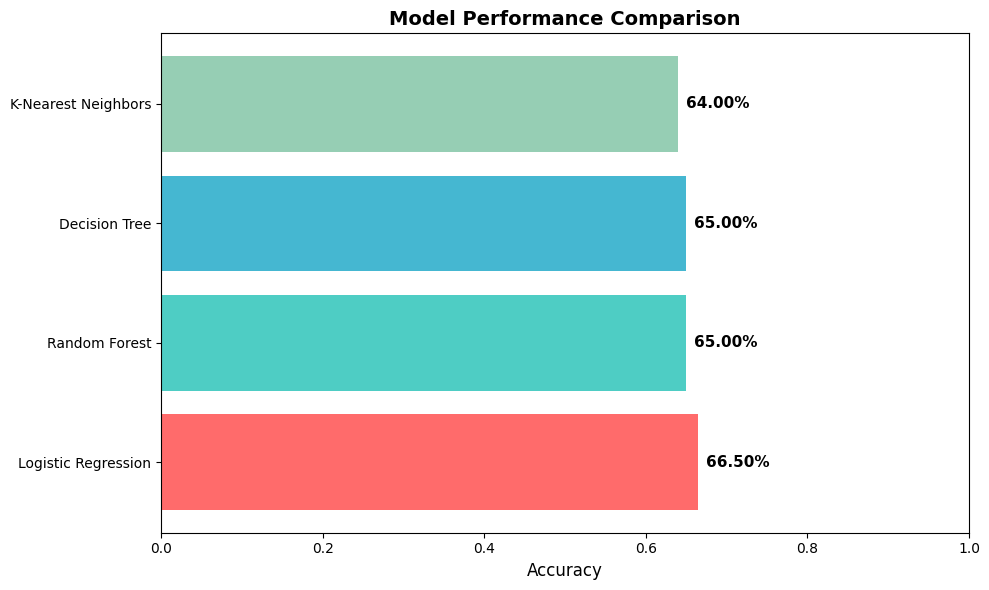


 All models trained and evaluated!


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

print("TRAINING AND EVALUATING MODELS...")
print("="*70)

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"  {name}")
    print(f"{'='*70}")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['At Risk', 'Success']))

print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:.<40} {acc:.4f} ({acc*100:.2f}%)")

plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = plt.barh(model_names, accuracies, color=colors)
plt.xlabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlim([0, 1])

for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    plt.text(acc + 0.01, i, f'{acc*100:.2f}%', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n All models trained and evaluated!")

FEATURE IMPORTANCE ANALYSIS

Features ranked by importance (absolute coefficient value):
                       feature  coefficient
3                        lunch     1.154949
4      test preparation course    -0.982143
0                       gender    -0.406228
1               race/ethnicity     0.262028
2  parental level of education    -0.172066


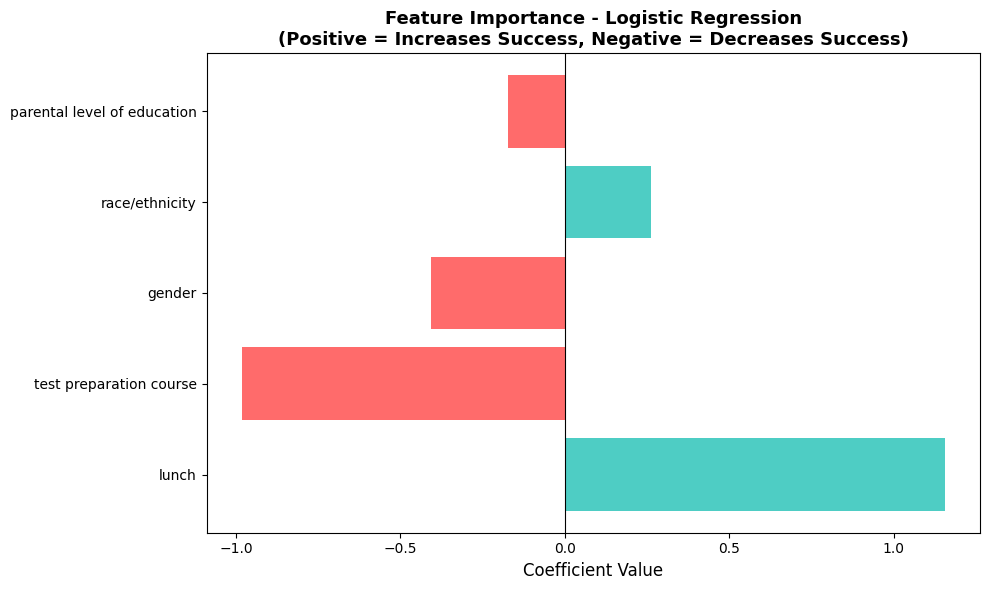

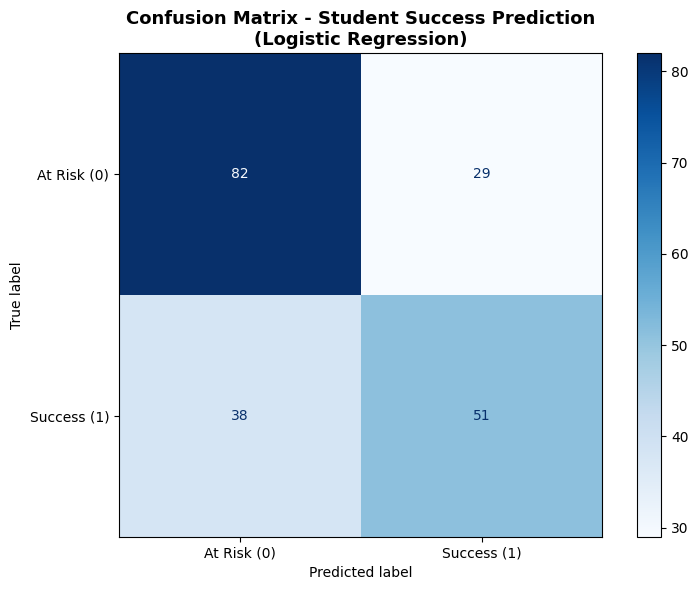


DETAILED PERFORMANCE METRICS
Accuracy:  0.6650 (66.50%)
Precision: 0.6375 (63.75%)
Recall:    0.5730 (57.30%)
F1-Score:  0.6036

CONFUSION MATRIX BREAKDOWN
True Negatives (Correctly predicted At Risk):  82
False Positives (Predicted Success, Actually At Risk): 29
False Negatives (Predicted At Risk, Actually Success): 38
True Positives (Correctly predicted Success): 51

 Model analysis complete!


In [15]:
best_model = LogisticRegression(random_state=42, max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': best_model.coef_[0],
    'abs_coefficient': abs(best_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)
print("\nFeatures ranked by importance (absolute coefficient value):")
print(feature_importance[['feature', 'coefficient']])

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in feature_importance['coefficient']]
plt.barh(feature_importance['feature'], feature_importance['coefficient'], color=colors)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Importance - Logistic Regression\n(Positive = Increases Success, Negative = Decreases Success)', 
          fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['At Risk (0)', 'Success (1)'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix - Student Success Prediction\n(Logistic Regression)', 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print("\n" + "="*70)
print("DETAILED PERFORMANCE METRICS")
print("="*70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f} ({accuracy_score(y_test, y_pred)*100:.2f}%)")
print(f"Precision: {precision_score(y_test, y_pred):.4f} ({precision_score(y_test, y_pred)*100:.2f}%)")
print(f"Recall:    {recall_score(y_test, y_pred):.4f} ({recall_score(y_test, y_pred)*100:.2f}%)")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

print("\n" + "="*70)
print("CONFUSION MATRIX BREAKDOWN")
print("="*70)
print(f"True Negatives (Correctly predicted At Risk):  {cm[0][0]}")
print(f"False Positives (Predicted Success, Actually At Risk): {cm[0][1]}")
print(f"False Negatives (Predicted At Risk, Actually Success): {cm[1][0]}")
print(f"True Positives (Correctly predicted Success): {cm[1][1]}")

print("\n Model analysis complete!")

In [16]:
print("UNDERSTANDING THE ENCODING")
print("="*70)

for col in categorical_columns:
    print(f"\n{col.upper()}:")
    original_values = df[col].unique()
    encoded_values = df_model[col].unique()
    
    mapping = {}
    for orig in original_values:
        encoded = df_model[df[col] == orig][col].iloc[0]
        mapping[orig] = encoded
    
    sorted_mapping = dict(sorted(mapping.items(), key=lambda x: x[1]))
    for category, code in sorted_mapping.items():
        print(f"  {code} = {category}")

print("\n" + "="*70)
print("INTERPRETING COEFFICIENTS")
print("="*70)

for idx, row in feature_importance.iterrows():
    feature = row['feature']
    coef = row['coefficient']
    
    if coef > 0:
        direction = "INCREASES success probability"
        impact = "POSITIVE"
    else:
        direction = "DECREASES success probability"
        impact = "NEGATIVE"
    
    print(f"\n{feature}:")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  Impact: {impact} - {direction}")
    print(f"  Interpretation: Higher encoded values → {'higher' if coef > 0 else 'lower'} success chance")

UNDERSTANDING THE ENCODING

GENDER:
  0 = female
  1 = male

RACE/ETHNICITY:
  0 = group A
  1 = group B
  2 = group C
  3 = group D
  4 = group E

PARENTAL LEVEL OF EDUCATION:
  0 = associate's degree
  1 = bachelor's degree
  2 = high school
  3 = master's degree
  4 = some college
  5 = some high school

LUNCH:
  0 = free/reduced
  1 = standard

TEST PREPARATION COURSE:
  0 = completed
  1 = none

INTERPRETING COEFFICIENTS

lunch:
  Coefficient: 1.1549
  Impact: POSITIVE - INCREASES success probability
  Interpretation: Higher encoded values → higher success chance

test preparation course:
  Coefficient: -0.9821
  Impact: NEGATIVE - DECREASES success probability
  Interpretation: Higher encoded values → lower success chance

gender:
  Coefficient: -0.4062
  Impact: NEGATIVE - DECREASES success probability
  Interpretation: Higher encoded values → lower success chance

race/ethnicity:
  Coefficient: 0.2620
  Impact: POSITIVE - INCREASES success probability
  Interpretation: Higher e

In [17]:
print("\n" + "="*70)
print("KEY INSIGHTS FROM THE MODEL")
print("="*70)

print("\n TOP PREDICTORS OF STUDENT SUCCESS:\n")

print("1. LUNCH TYPE (Coefficient: +1.15) - STRONGEST PREDICTOR")
print("    Standard lunch (1) = MUCH higher success")
print("    Free/reduced lunch (0) = Much lower success")
print("   → Socioeconomic status is the #1 factor\n")

print("2. TEST PREPARATION COURSE (Coefficient: -0.98)")
print("    Completed test prep (0) = Higher success")
print("    No test prep (1) = Lower success")
print("   → Students who complete test prep are significantly more likely to succeed\n")

print("3. GENDER (Coefficient: -0.41)")
print("    Female (0) = Higher success rates")
print("    Male (1) = Lower success rates")
print("   → Female students slightly outperform male students\n")

print("4. RACE/ETHNICITY (Coefficient: +0.26)")
print("   → Higher group letters (D, E) correlate with slightly better outcomes")
print("   → Modest impact compared to other factors\n")

print("5. PARENTAL EDUCATION (Coefficient: -0.17)")
print("   → Lower codes (associate's, bachelor's) perform better")
print("   → Weakest predictor in the model\n")

print("="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n Overall Accuracy: {accuracy*100:.2f}%")
print(f"   - Correctly predicted {int(accuracy*200)}/200 students\n")

print(f" Precision: {precision*100:.2f}%")
print(f"   - When we predict 'Success', we're right {precision*100:.1f}% of the time\n")

print(f" Recall: {recall*100:.2f}%")
print(f"   - We identify {recall*100:.1f}% of actually successful students\n")

print(f"  F1-Score: {f1:.2f}")
print(f"   - Balanced measure of precision and recall\n")

print("="*70)
print("CONFUSION MATRIX INSIGHTS")
print("="*70)
print(f"\n Correctly identified {cm[0][0]} at-risk students (can provide early intervention)")
print(f" Correctly identified {cm[1][1]} successful students")
print(f"  Misclassified {cm[0][1]} at-risk students as successful (false positives)")
print(f"  Misclassified {cm[1][0]} successful students as at-risk (false negatives)")

print("\n" + "="*70)
print("BUSINESS RECOMMENDATIONS")
print("="*70)
print("""
1.   Socioeconomic Support: Lunch type is the strongest predictor
   → Target intervention programs for free/reduced lunch students
   
2.  Test Prep Programs: Strong positive impact on success
   → Expand access to test preparation courses
   → Make completion mandatory for at-risk students
   
3.  Gender-Specific Support: Males show lower success rates
   → Develop targeted support programs for male students
   
4.  Early Identification: Model can identify at-risk students with 66.5% accuracy
   → Use predictions to allocate resources proactively
   → Combine with teacher observations for better accuracy
""")

print("="*70)


KEY INSIGHTS FROM THE MODEL

 TOP PREDICTORS OF STUDENT SUCCESS:

1. LUNCH TYPE (Coefficient: +1.15) - STRONGEST PREDICTOR
    Standard lunch (1) = MUCH higher success
    Free/reduced lunch (0) = Much lower success
   → Socioeconomic status is the #1 factor

2. TEST PREPARATION COURSE (Coefficient: -0.98)
    Completed test prep (0) = Higher success
    No test prep (1) = Lower success
   → Students who complete test prep are significantly more likely to succeed

3. GENDER (Coefficient: -0.41)
    Female (0) = Higher success rates
    Male (1) = Lower success rates
   → Female students slightly outperform male students

4. RACE/ETHNICITY (Coefficient: +0.26)
   → Higher group letters (D, E) correlate with slightly better outcomes
   → Modest impact compared to other factors

5. PARENTAL EDUCATION (Coefficient: -0.17)
   → Lower codes (associate's, bachelor's) perform better
   → Weakest predictor in the model

MODEL PERFORMANCE SUMMARY

 Overall Accuracy: 66.50%
   - Correctly predic

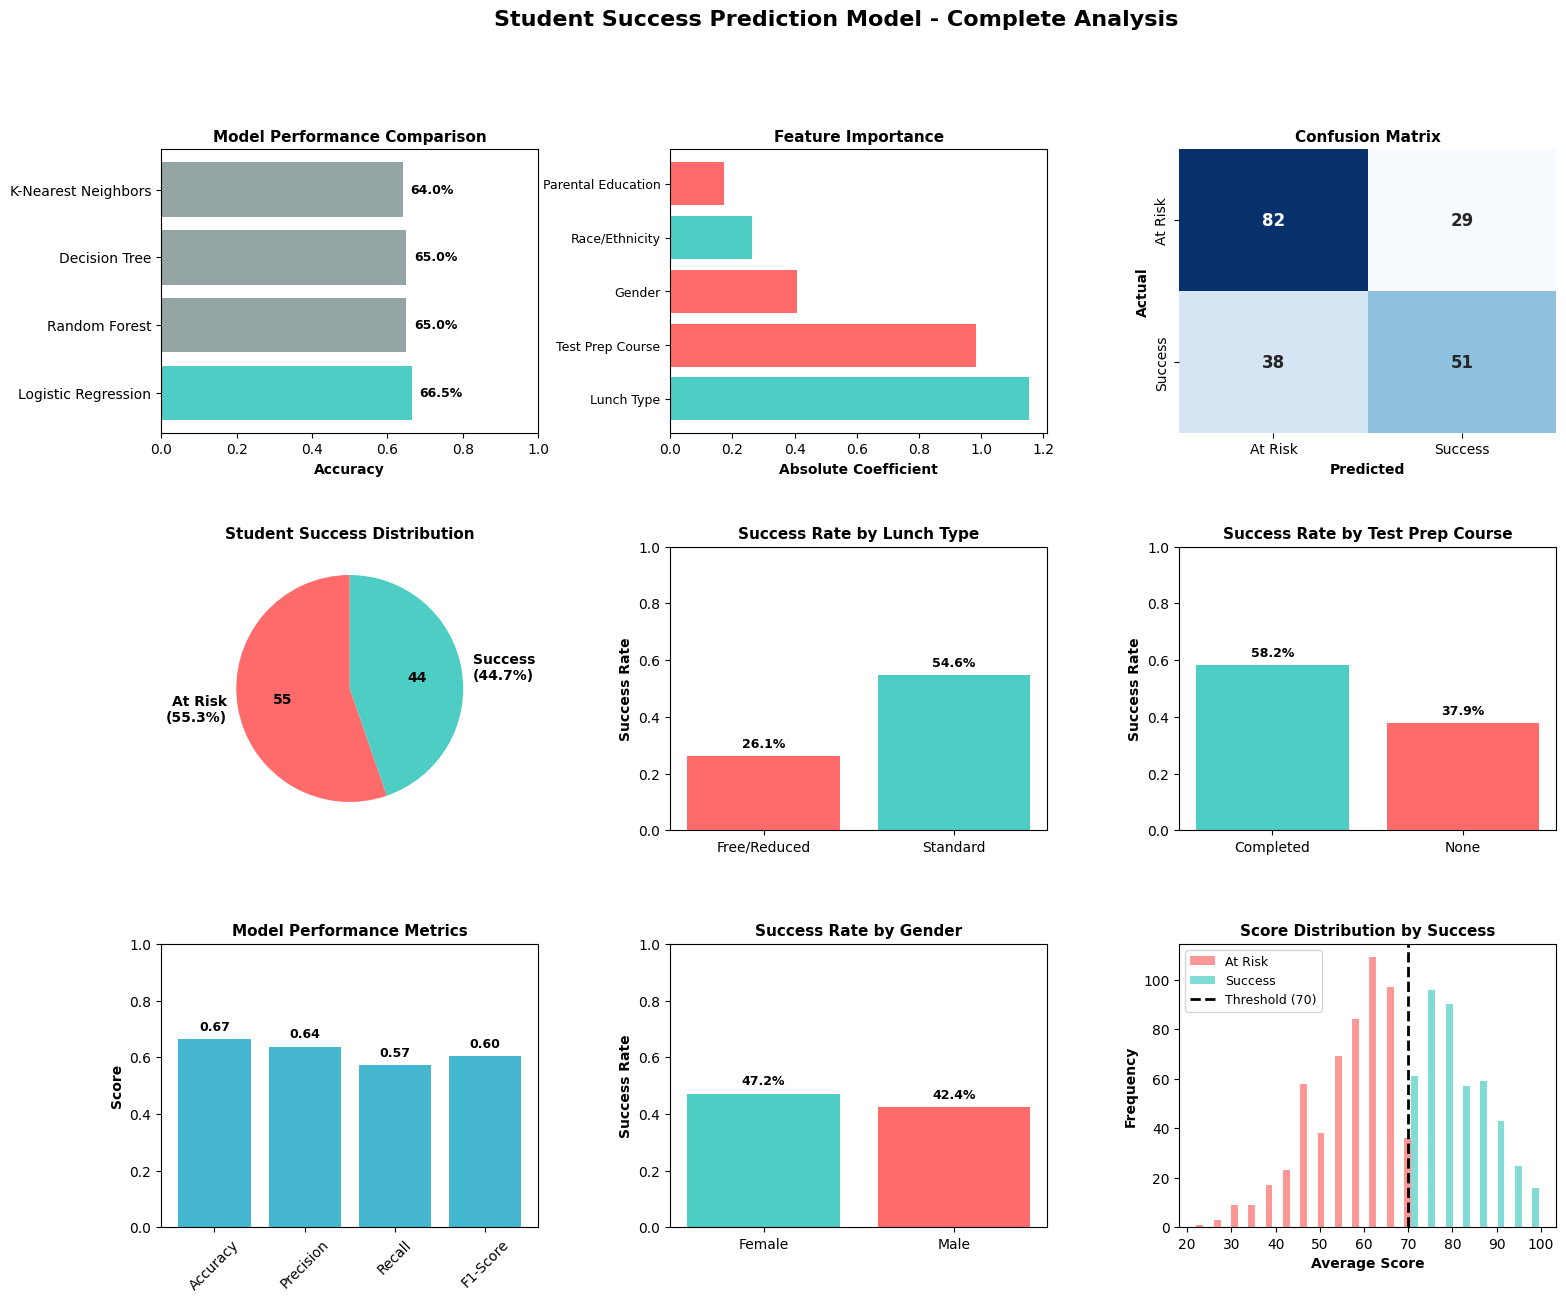

In [20]:
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.35)

ax1 = fig.add_subplot(gs[0, 0])
model_names = list(results.keys())
accuracies = list(results.values())
colors_models = ['#4ECDC4' if acc == max(accuracies) else '#95a5a6' for acc in accuracies]
ax1.barh(model_names, accuracies, color=colors_models)
ax1.set_xlabel('Accuracy', fontweight='bold')
ax1.set_title('Model Performance Comparison', fontweight='bold', fontsize=11)
ax1.set_xlim([0, 1])
for i, acc in enumerate(accuracies):
    ax1.text(acc + 0.02, i, f'{acc*100:.1f}%', va='center', fontweight='bold', fontsize=9)

ax2 = fig.add_subplot(gs[0, 1])
feature_names_short = {
    'gender': 'Gender',
    'race/ethnicity': 'Race/Ethnicity',
    'parental level of education': 'Parental Education',
    'lunch': 'Lunch Type',
    'test preparation course': 'Test Prep Course'
}
feature_importance_display = feature_importance.copy()
feature_importance_display['feature_short'] = feature_importance_display['feature'].map(feature_names_short)

colors_feat = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in feature_importance_display['coefficient']]
ax2.barh(feature_importance_display['feature_short'], abs(feature_importance_display['coefficient']), color=colors_feat)
ax2.set_xlabel('Absolute Coefficient', fontweight='bold', fontsize=10)
ax2.set_title('Feature Importance', fontweight='bold', fontsize=11)
ax2.tick_params(axis='y', labelsize=9)

ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3, 
            xticklabels=['At Risk', 'Success'],
            yticklabels=['At Risk', 'Success'],
            cbar=False, annot_kws={"size": 12, "weight": "bold"})
ax3.set_title('Confusion Matrix', fontweight='bold', fontsize=11)
ax3.set_ylabel('Actual', fontweight='bold')
ax3.set_xlabel('Predicted', fontweight='bold')

ax4 = fig.add_subplot(gs[1, 0])
target_counts = y.value_counts()
wedges, texts, autotexts = ax4.pie(target_counts, labels=['At Risk\n(55.3%)', 'Success\n(44.7%)'], 
                                     autopct='%d', colors=['#FF6B6B', '#4ECDC4'], 
                                     startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
ax4.set_title('Student Success Distribution', fontweight='bold', fontsize=11)

ax5 = fig.add_subplot(gs[1, 1])
lunch_success_rate = df.groupby('lunch')['student_success'].mean()
lunch_labels = ['Free/Reduced', 'Standard']
bars5 = ax5.bar(lunch_labels, lunch_success_rate.values, color=['#FF6B6B', '#4ECDC4'])
ax5.set_ylabel('Success Rate', fontweight='bold')
ax5.set_title('Success Rate by Lunch Type', fontweight='bold', fontsize=11)
ax5.set_ylim([0, 1])
for i, bar in enumerate(bars5):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax6 = fig.add_subplot(gs[1, 2])
prep_success_rate = df.groupby('test preparation course')['student_success'].mean()
prep_labels = ['Completed', 'None']
bars6 = ax6.bar(prep_labels, prep_success_rate.values, color=['#4ECDC4', '#FF6B6B'])
ax6.set_ylabel('Success Rate', fontweight='bold')
ax6.set_title('Success Rate by Test Prep Course', fontweight='bold', fontsize=11)
ax6.set_ylim([0, 1])
for i, bar in enumerate(bars6):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax7 = fig.add_subplot(gs[2, 0])
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]
bars7 = ax7.bar(metrics_names, metrics_values, color='#45B7D1')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('Model Performance Metrics', fontweight='bold', fontsize=11)
ax7.set_ylim([0, 1])
ax7.tick_params(axis='x', rotation=45)
for i, bar in enumerate(bars7):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax8 = fig.add_subplot(gs[2, 1])
gender_success_rate = df.groupby('gender')['student_success'].mean()
gender_labels = ['Female', 'Male']
bars8 = ax8.bar(gender_labels, gender_success_rate.values, color=['#4ECDC4', '#FF6B6B'])
ax8.set_ylabel('Success Rate', fontweight='bold')
ax8.set_title('Success Rate by Gender', fontweight='bold', fontsize=11)
ax8.set_ylim([0, 1])
for i, bar in enumerate(bars8):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax9 = fig.add_subplot(gs[2, 2])
ax9.hist([df[df['student_success']==0]['average_score'], 
          df[df['student_success']==1]['average_score']], 
         bins=20, color=['#FF6B6B', '#4ECDC4'], label=['At Risk', 'Success'], alpha=0.7)
ax9.axvline(70, color='black', linestyle='--', linewidth=2, label='Threshold (70)')
ax9.set_xlabel('Average Score', fontweight='bold')
ax9.set_ylabel('Frequency', fontweight='bold')
ax9.set_title('Score Distribution by Success', fontweight='bold', fontsize=11)
ax9.legend(fontsize=9)

fig.suptitle('Student Success Prediction Model - Complete Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

plt.savefig('student_success_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
